---
# Préparation des Données

---

Pour préparer adéquatement les données avant de les fournir à un ou plusieurs algorithmes d'apprentissage automatique, il faut également s'assurer de la bonne représentation de ces données pour ne pas leur fournir de valeurs trop différentes qu'ils ne pourraient manipuler conjointement.

<center><img src="./img/mlprocess_2.png" alt="Processus d'apprentissage automatique" width="50%"/></center>

1. Le nettoyage et les aberrations statistiques.
2. L'imputation de données manquantes.
3. Équilibrage de données déséquilibrées.
4. **Transformation des données**
    1. *rescaling* et *normalizing* (\[0, 1\] ou \[-1, 1\]), *standardizing* (loi normale).
    2. Traitement des variables catégoriques.
5. Réduction de la dimensionnalité ou création de caractéristiques
    1. Réduction de la dimensionnalité
    2. Déroulement ou aplatissement d'une surface 3D en 2D


## 4. Transformation des données

### Rééchelonnage ou normalisation

Séquence inspirée des exemples de code de la librairie Scikit-Learn de [Raghav RV](mailto:rvraghav93@gmail.com), [Guillaume Lemaitre](mailto:g.lemaitre58@gmail.com) et Thomas Unterthiner (License: BSD 3 clause)

Le code ci-dessous sert à afficher les graphiques joliment.


In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

print(__doc__)

cmap = getattr(cm, 'jet_r', cm.jet_r)

def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # Définition des axes pour la première figure.
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # Définition des axes pour la zone agrandie.
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # Définition des axes pour la barre de couleurs.
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="", x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # Diagramme de points
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Histogramme pour l'axe X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal', color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogramme pour l'axe X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical', color='grey', ec='grey')
    hist_X0.axis('off')

def make_plot(title, X):
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Revenu médian",
                      x1_label="Nombre d'occupants",
                      title="Données complètes")

    # Élimination des outliers 
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=200,
                      x0_label="Revenu médian",
                      x1_label="Nombre d'occupants",
                      title="Sans outliers")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Valeur de la maison *100 K$')



Automatically created module for IPython interactive environment


#### Données brutes

Si on ne touche à rien, ça donne ceci:

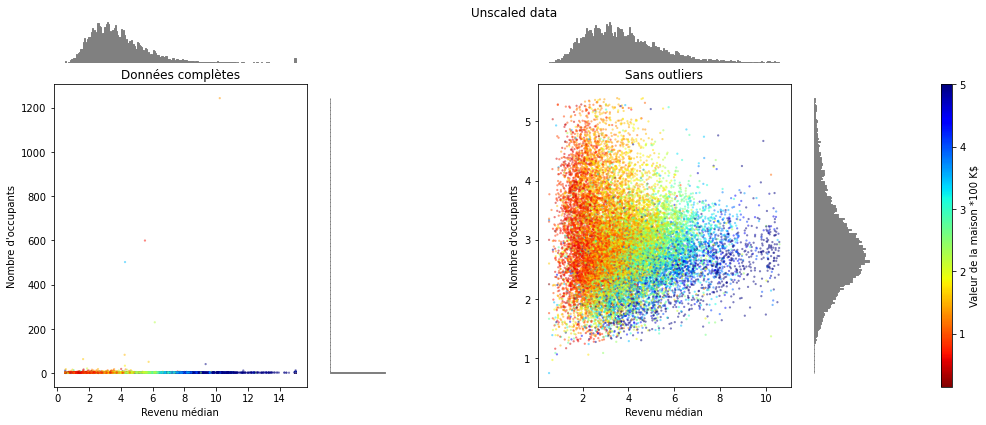

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import minmax_scale
# Données des maisons californiennes : La valeur à prédire est la valeur de la maison en centaine de milliers de dollars US
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
#print(dataset.DESCR)
# On ne prends que 2 caractéristiques pour faciliter la visualisation : la composante #0 a une distribution 'heavy-tailed', et la #5 a quelques données aberrantes très prononcées
X = X_full[:, [0, 5]]

# On reéchelonne la donnée de sortie entre 0 et 1 pour mieux visualiser la légende (étalement de la couleur)
y = minmax_scale(y_full)

data = ('Unscaled data', X)
make_plot(*data)

#### Standardisation 

Pour rappel : $x_i = \frac{x_i - \bar{x}}{\sigma(x)}$
    
La standardisation est une transformation linéaire qui ne change rien à 
l'affichage. En effet, les fonctions d'affichage ajustent par défaut les bornes des figures afin de contenir 
l'ensemble des données. L'aspect d'une distribution de points ne change donc pas avant et après la transformation 
mis à part les bornes des axes.  


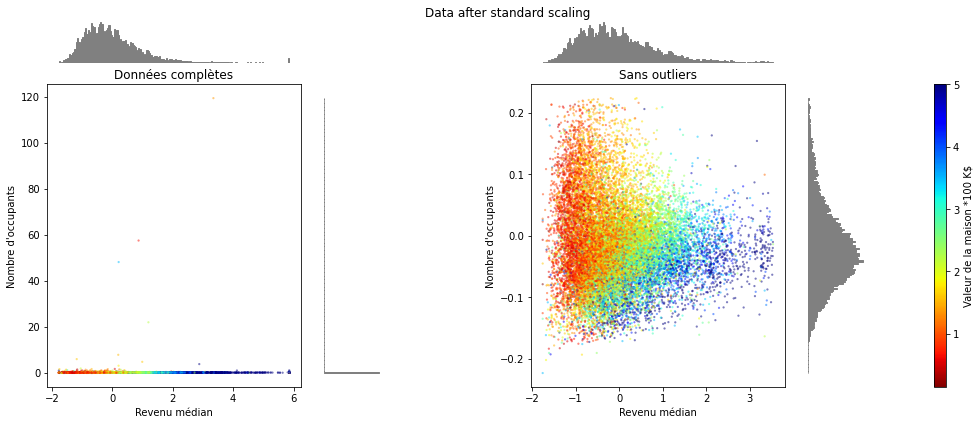

In [3]:
from sklearn.preprocessing import StandardScaler
data = ('Data after standard scaling', StandardScaler().fit_transform(X))
make_plot(*data)

#### Min-Max

Pour rappel : $x_i = \frac{x_i - \min_i{x_i}}{\max_i{x_i}-\min_i{x_i}}$

C'est une autre transformation linéaire. Il n'y a pas de différences entre ces deux figures et les deux précédentes mis 
à part les bornes des axes. 

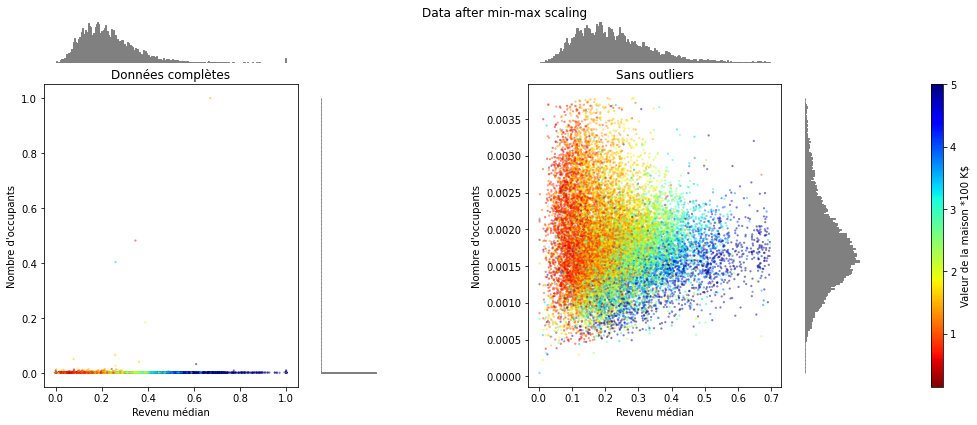

In [4]:
from sklearn.preprocessing import MinMaxScaler
data = ('Data after min-max scaling', MinMaxScaler().fit_transform(X))
make_plot(*data)

#### Max-Abs

Pour rappel : $x_i = \frac{x_i}{\max_i{|x_i|}}$
    
Une autre transformation linéaire sans surprise.

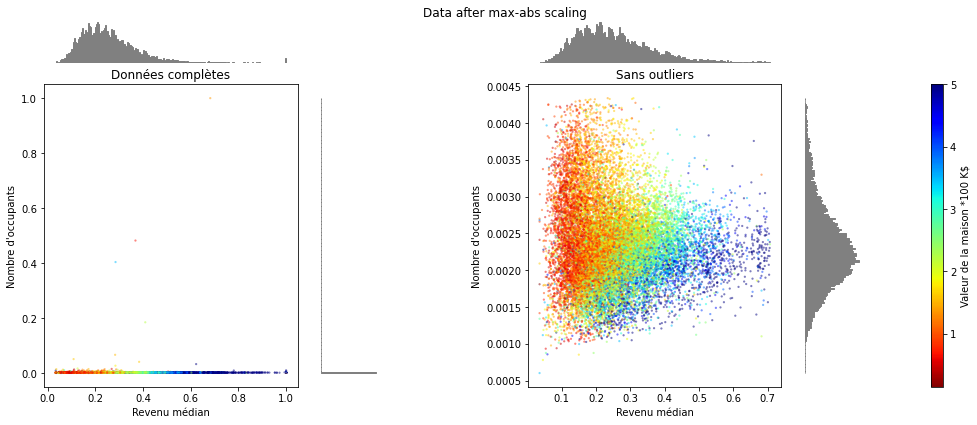

In [5]:
from sklearn.preprocessing import MaxAbsScaler
data = ('Data after max-abs scaling', MaxAbsScaler().fit_transform(X))
make_plot(*data)

#### Robuste (basé sur les quantiles 1 et 3)

Pour rappel : $x_i = \frac{x_i - Q_1(x)}{Q_3(x) - Q_1(x)}$

Le centrage et la mise à l'échelle s'effectuent indépendamment sur chaque caractéristique en calculant les statistiques pertinentes sur les échantillons de l'ensemble d'apprentissage. La médiane et l'intervalle interquartile sont ensuite stockés pour être utilisés sur des données ultérieures à l'aide de la méthode de transformation.

La standardisation est une pratique courante pour de nombreux estimateurs d'apprentissage automatique. Cela se fait généralement en supprimant la moyenne et en divisant par la variance. Cependant, les valeurs aberrantes peuvent souvent influencer négativement la moyenne/variance de l'échantillon. Dans ce cas, la médiane et l’intervalle interquartile donnent souvent de meilleurs résultats. 
La transformation résultante demeure quand même linéaire; même distribution observée aux bornes près!


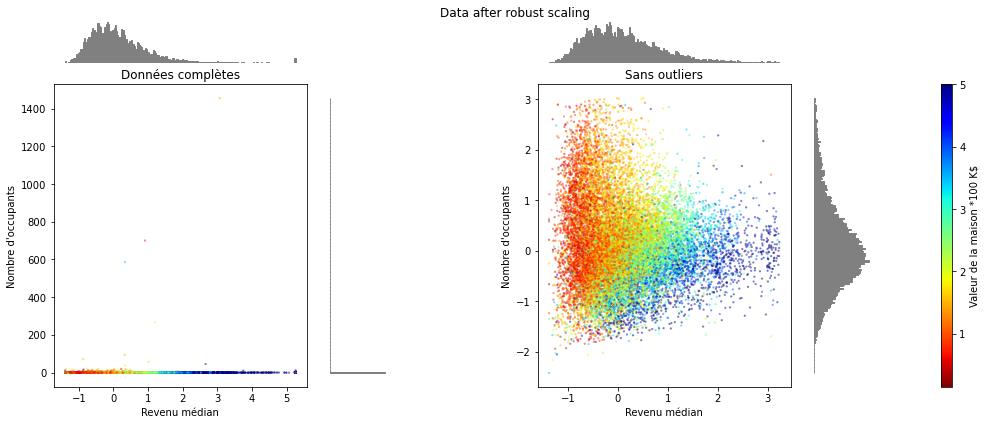

In [6]:
from sklearn.preprocessing import RobustScaler
data = ('Data after robust scaling', RobustScaler(quantile_range=(25, 75)).fit_transform(X))
make_plot(*data)

#### Transformation par puissance

Famille de transformations paramétriques et monotones (non-linéaires) utilisées afin de transformer une distribution de données arbitraire en une autre approximativement gaussienne. C'est très utile pour traiter les problèmes liés à l'hétéroscédasticité (variance non constante) ou ceux pour lesquels une distribution normale est souhaitée. En effet, beaucoup de méthodes d'analyse des données font l'hypothèse que celles-ci ont une distribution gaussienne. Ça permet d'obtenir des solutions analytiques aux problèmes. C'est bien pratique, mais souvent loin de la réalité.  

Une transformation non-linéaire fausse les corrélations linéaires entre les variables mesurées à la même échelle. Toutefois, 
elle rend les variables mesurées à différentes échelles plus directement comparables.

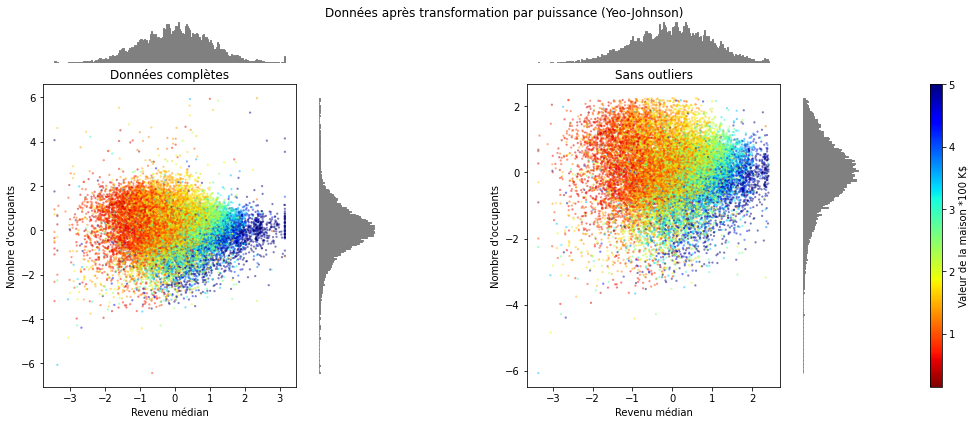

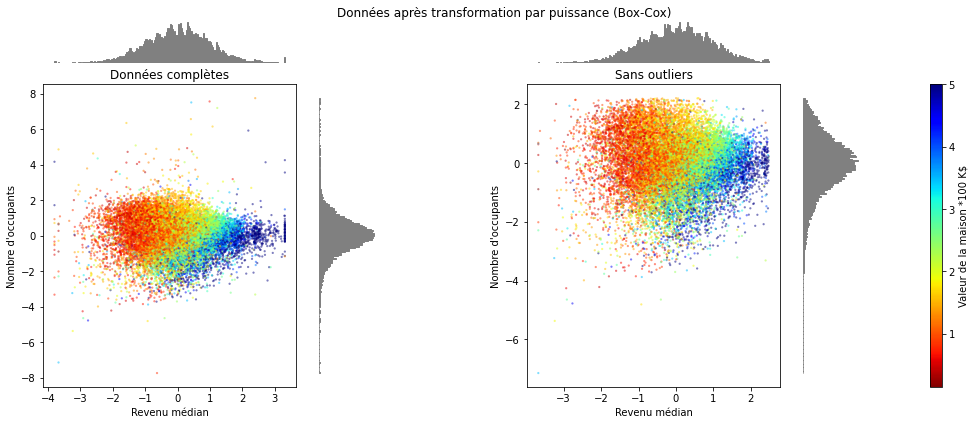

In [7]:
from sklearn.preprocessing import PowerTransformer
data = ('Données après transformation par puissance (Yeo-Johnson)', PowerTransformer(method='yeo-johnson').fit_transform(X))
make_plot(*data)
data = ('Données après transformation par puissance (Box-Cox)', PowerTransformer(method='box-cox').fit_transform(X))
make_plot(*data)

#### Transformation par quantile

La fonction de densité cumulée d'une variable est utilisée pour projeter les valeurs originales (à l'intérieur d'une plage de valeurs) vers de nouvelles valeurs ayant une distribution spécifique (gaussienne, uniforme, etc.). 
Les valeurs originales hors de la plage seront projetées aux limites de la distribution en sortie. 
Voilà une autre transformation non-linéaire. Notez à quel point les histogrammes des données transformées sont maintenant gaussiens ou uniformes.

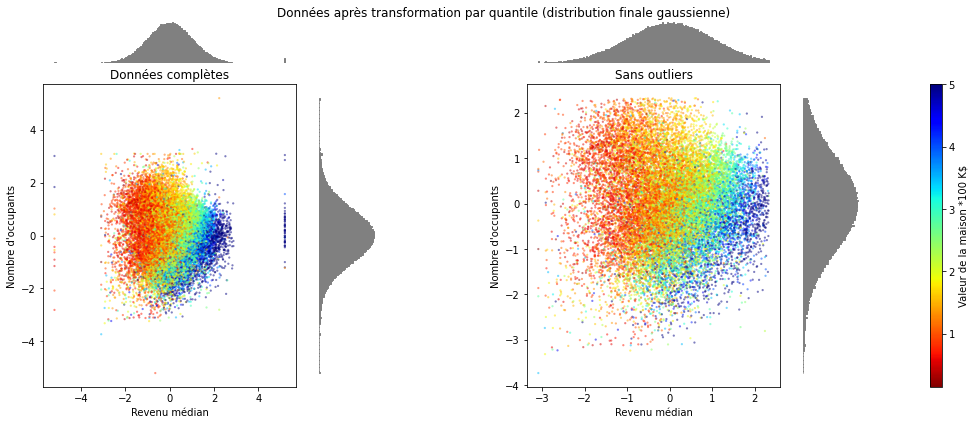

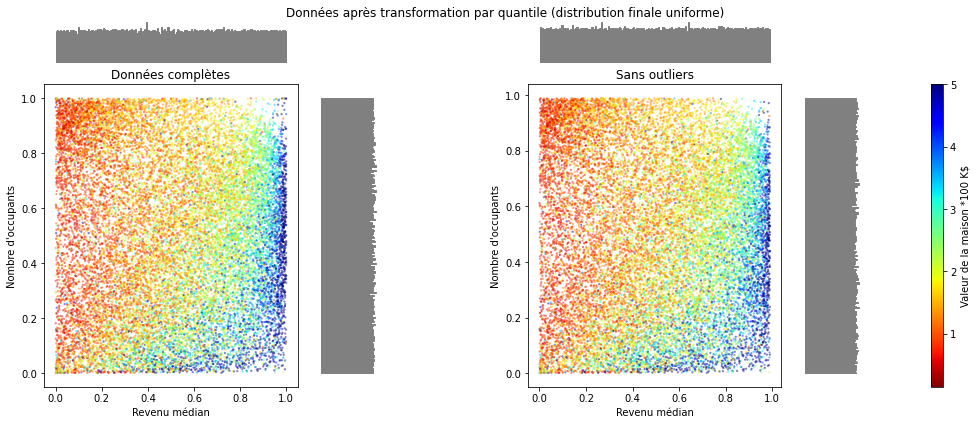

In [8]:
from sklearn.preprocessing import QuantileTransformer

data = ('Données après transformation par quantile (distribution finale gaussienne)', QuantileTransformer(output_distribution='normal').fit_transform(X))
make_plot(*data)
data = ('Données après transformation par quantile (distribution finale uniforme)', QuantileTransformer(output_distribution='uniform').fit_transform(X))
make_plot(*data)


#### Normalisation 
 
Pour rappel : $x_i = \frac{x_i}{ ||x_i|| }$

La mise à l'échelle des entrées, au moyen de la norme du vecteur d'entrées, est une opération courante pour la classification de texte et l'analyse de cluster. Par exemple, le produit scalaire de deux vecteurs TF-IDF normalisés en $L_2$ correspond à leur métrique de similarité cosinus. C'est la métrique de base pour le modèle d'espace vectoriel couramment utilisé par la communauté de récupération d'informations (data mining).


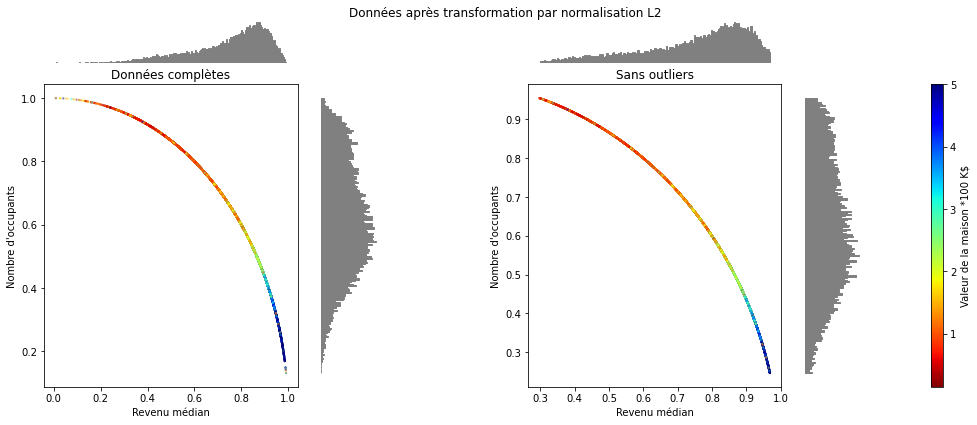

In [9]:
from sklearn.preprocessing import Normalizer
data = ('Données après transformation par normalisation L2', Normalizer().fit_transform(X))
make_plot(*data)

#### Comparaison entre les différents rééchantillonneurs


In [10]:
dfX = pd.DataFrame(dataset.data, columns=dataset.feature_names)
dfX = dfX.drop(dataset.feature_names[1:],axis=1)

col = dfX.MedInc.values.reshape(-1, 1)

scalers = [
    ('Standard', StandardScaler()),
    ('Min-Max', MinMaxScaler()),
    ('Max-Abs', MaxAbsScaler()),
    ('Robuste', RobustScaler(quantile_range=(25, 75))),
    ('Quantile (gaussian)', QuantileTransformer(output_distribution='normal')),
    ('Quantile (uniforme)', QuantileTransformer(output_distribution='uniform'))
]

for scaler in scalers:
    dfX[scaler[0]] = scaler[1].fit_transform(col)
    

dfX.describe()

,MedInc,Standard,Min-Max,Max-Abs,Robuste,Quantile (gaussian),Quantile (uniforme)
count,20640.000000,2.064000e+04,20640.000000,20640.000000,2.064000e+04,20640.000000,20640.000000
mean,3.870671,3.734255e-16,0.232464,0.258043,1.540799e-01,0.004036,0.500000
std,1.899822,1.000024e+00,0.131020,0.126654,8.715378e-01,1.024356,0.288701
min,0.499900,-1.774299e+00,0.000000,0.033326,-1.392252e+00,-5.199338,0.000000
25%,2.563400,-6.881186e-01,0.142308,0.170892,-4.456270e-01,-0.675278,0.249750
50%,3.534800,-1.767951e-01,0.209301,0.235652,1.018608e-16,-0.000163,0.499935
75%,4.743250,4.593063e-01,0.292641,0.316215,5.543730e-01,0.674159,0.749895
max,15.000100,5.858286e+00,1.000000,1.000000,5.259674e+00,5.199338,1.000000


Pour mieux comprendre les différences entre les rééchantillonneurs, voici une visualisation de la caractéristique `Revenu médian` avant et après transformation.

Dans la ligne du haut, les distributions des valeurs originales apparaissent en bleu, et celles des valeurs 
transformées, en rouge. La ligne du bas montre la relation entre le `Revenu médian` original et sa valeur transformée. Les quatre 
premières transformations sont linéaires et les deux suivantes sont non-linéaires. 


C:\Users\Pierre Gravel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pierre Gravel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pierre Gravel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

<Figure size 1080x360 with 0 Axes>

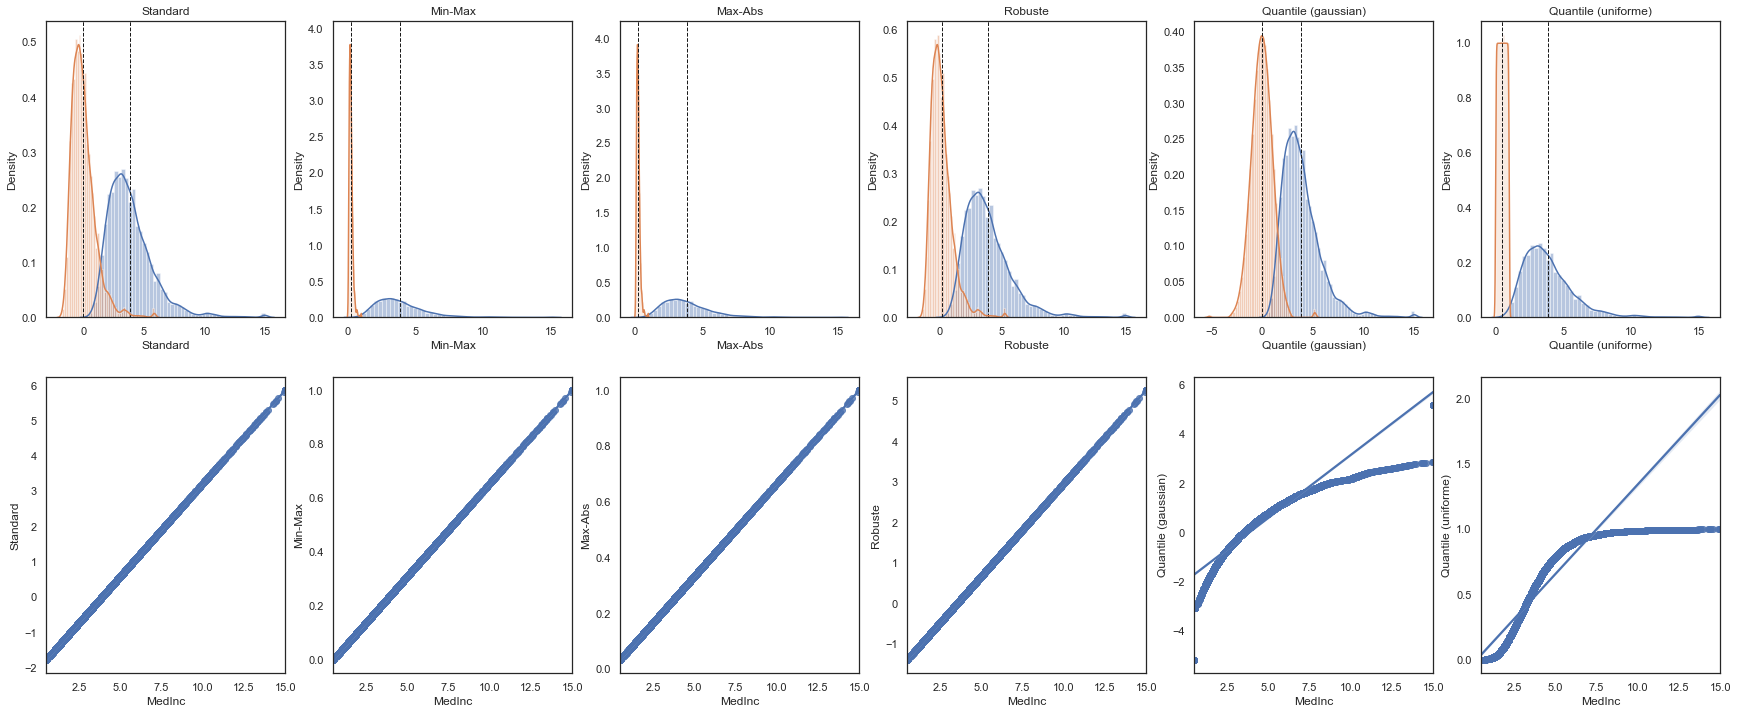

In [11]:
import seaborn as sns
sns.set(style="white", color_codes=True)

plt.figure(figsize=(15,5))

cpt = 1
f = plt.figure(figsize=(30,12))
for scaler in scalers:
    name = scaler[0]
    ax = f.add_subplot(2,len(scalers),cpt)
    
    sns.distplot(dfX.MedInc,ax=ax)
    ax.axvline(dfX.MedInc.mean(), color='k', linestyle='dashed', linewidth=1)
    sns.distplot(dfX[name],ax=ax)
    ax.axvline(dfX[name].mean(), color='k', linestyle='dashed', linewidth=1)
    ax.set_title(name)

    ax = f.add_subplot(2,len(scalers),cpt+len(scalers))
    g = sns.regplot(x="MedInc", y=name, data=dfX,ax=ax)
    cpt+=1

### Traitement des variables catégoriques

**Regroupement de catégories en une seule valeur:**

Exemple: Vous avez une variable catégorielle `pays` qui a 180 valeurs uniques. Vous voulez voir les 3 pays les plus importants seulement et placer tous les autres pays dans une valeur "autre".

```
# Afficher le nombre de valeurs uniques de chaque variable catégorique dans les données
for i in df.columns:
    if df[i].dtypes=='object': 
        unique_cat=len(df[i].unique())
        print("La caractéristique '{i}' a {unique_cat} catégories uniques".format(col_name=col_name, unique_cat=unique_cat))

# Afficher le nombre de valeurs de chaque variable catégorique
print(df['pays'].value_counts())

# Catégoriser les catégories moins fréquentes comme "autres"
def repl(x):
    if x == 'US': return 'US'
    elif x == 'BR': return 'BR'
    elif x == 'ES': return 'ES'
    else: return 'Other'
    
df['pays'] = df['COUNTRY'].apply(repl)
print(df['pays'].value_counts().sort_values(ascending=False))
```

**Regroupement de variables numériques en catégories**

**Catégories de taille égales :**

```
df['var'] = 0
var = pd.qcut(x=COL1, q=3, labels=["good", "medium", "bad"])
print(df['var'].value_counts().sort_values(ascending=False))
```
Ajustez le nombre de catégories (q) et les étiquettes.

**Catégories par intervalles identiques :**

```
bins = [0, 20, 40, 60, 80, 100] 
df.var = pd.cut(x=COL1, bins, labels=['Very low', 'Low', 'Medium', 'High', 'Very high']) 
print(data['var'].value_counts().sort_values(ascending = False))
```
Ajustez les catégories en spécifiant les seuils (doit avoir un de plus que le nombre de catégories/étiquettes). Par défaut, les emplacements incluent le bord le plus à droite; définissez l'argument `right = False` si les limites de droite ne doivent pas être incluses.

### Encoder des variables catégoriques

**Encoder une variable booléenne en la transformant en entier :**

```
df['BOOL'] = (df.COL1=="ABC").astype(int)
dta.head()
```
Dans cet exemple, COL1 contient des valeurs de chaîne. BOOL sera égal à 1 si COL1 contient "ABC".

**Encoder manuellement en mappant un dictionnaire :**

```
dic = {'Yes': 1, 'No': 2}
df['VAR'] = df['VAR'].map(dic)
```

**Encoder automatiquement (OneHot) :**

```
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(categorical_features = [0])
x = onehotencoder.fit_transform(x).toarray()

```
La colonne devant être encodée est spécifiée dans le constructeur [0] dans l'exemple. Les données `x` sont ensuite transformées avec l’objet onehotencoder. Après ces étapes, il y a maintenant autant de nouvelles colonnes dans le jeu de données que de catégories dans la colonne [0].
